In [7]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000)

model.fit(X_scaled, y)

feature_weights = model.coef_[0]
intercept = model.intercept_

def print_logistic_regression_model(weights, intercept):
    print("Модель логістичної регресії:")
    for i, weight in enumerate(weights):
        print(f"Ознака {i+1}: {weight}")
    print(f"Інтерсепт (зміщення): {intercept}")

print_logistic_regression_model(feature_weights, intercept)

Модель логістичної регресії:
Ознака 1: -1.0740414858360163
Ознака 2: 1.1600634216479493
Ознака 3: -1.9306286585787165
Ознака 4: -1.8116887259627756
Інтерсепт (зміщення): [-0.20531681  2.07486525 -1.86954844]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {accuracy:.2f}")

Точність моделі: 1.00


In [8]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Завантаження датасету Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# PCA - зменшення розмірності даних до 2 головних компонент
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Побудова логістичної регресійної моделі
model = LogisticRegression(max_iter=1000)

# Тренування моделі на зменшених даних
model.fit(X_train_pca, y_train)

# Передбачення на тестовому наборі
y_pred = model.predict(X_test_pca)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {accuracy:.2f}")

Точність моделі: 0.90


Розмірність зменшених даних після PCA: (150, 2)


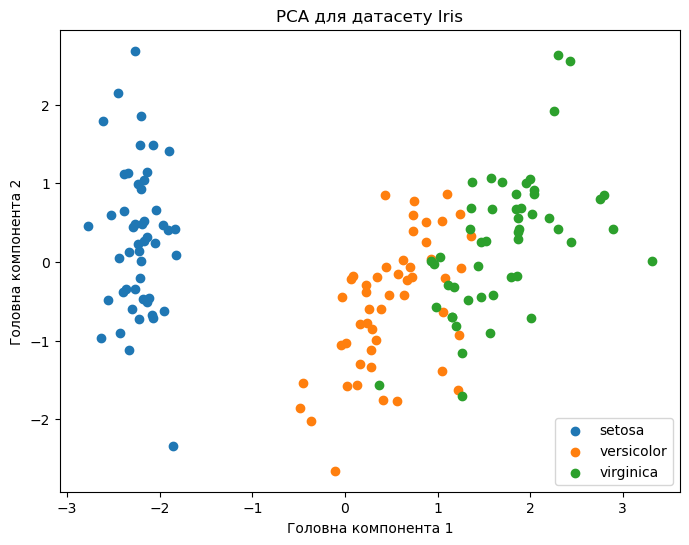

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Розмірність зменшених даних після PCA:", X_pca.shape)

# Відображення зменшених даних на графіку
plt.figure(figsize=(8, 6))
for i, target_name in zip([0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)

plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.title('PCA для датасету Iris')
plt.legend()
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = LogisticRegression(max_iter=1000)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {accuracy:.2f}")

Точність моделі: 0.90


In [17]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

U, sigma, VT = np.linalg.svd(X_scaled)

print("Матриця U:")
print(U)

print("\nДіагональна матриця Sigma:")
print(np.diag(sigma))

print("\nТранспонована матриця VT:")
print(VT)

Матриця U:
[[-1.08239531e-01 -4.09957970e-02  2.72186462e-02 ...  5.43380310e-02
   1.96438400e-03  2.46978090e-03]
 [-9.94577561e-02  5.75731483e-02  5.00034005e-02 ...  5.12936114e-03
   8.48544595e-02  5.83496936e-03]
 [-1.12996303e-01  2.92000319e-02 -9.42089147e-03 ...  2.75184277e-02
   1.78604309e-01  1.49419118e-01]
 ...
 [ 7.27030413e-02 -2.29793601e-02 -3.84023516e-02 ...  9.89532683e-01
  -1.25488246e-02 -7.17729676e-04]
 [ 6.56112167e-02 -8.63643414e-02 -1.98939364e-01 ... -1.41206665e-02
   9.52049996e-01 -2.32048811e-02]
 [ 4.59137323e-02  2.07800179e-03 -1.12588405e-01 ... -8.30595907e-04
  -2.19201906e-02  9.77300244e-01]]

Діагональна матриця Sigma:
[[20.92306556  0.          0.          0.        ]
 [ 0.         11.7091661   0.          0.        ]
 [ 0.          0.          4.69185798  0.        ]
 [ 0.          0.          0.          1.76273239]]

Транспонована матриця VT:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.0

In [18]:
k = 2
X_reduced = U[:, :k]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {accuracy:.2f}")


Точність моделі: 0.90


In [19]:
#Всі логістичні моделі показали хороший результат після застосування методів відбору ознак. В результаті SVD та PCA модель показала 90% точність моделі. Найкращий результат був від відбору ознак на основі ваг